In [75]:
import pandas as pd
import ffmpeg
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from models import CNN_model, SqueezeNet
from tester import Tester



from data_collection import cow_back_extraction, cow_delete, labelize


In [3]:
def crop_frames(file_name, sheet_name,fps):
    df = pd.read_excel(file_name,sheet_name)
    for t in range (0,len(df)):
        
        start = df.start[t]
        end = df.end[t]
        frame_number = int(fps*(end-start))
        #print(start,end)
        #first rgb, second depth
        !ffmpeg -i C:\Users\BOZ\Zoetis_BCS\top_second_heifers_group.mkv -map 0:0 -ss {start} -vframes {frame_number} C:\Users\BOZ\Zoetis_BCS\second_run\hf_rgb\{df.CowID[t]}_%03d.png
        !ffmpeg -i C:\Users\BOZ\Zoetis_BCS\top_second_heifers_group.mkv -map 0:1 -ss {start} -vframes {frame_number} C:\Users\BOZ\Zoetis_BCS\second_run\hf_depth\{df.CowID[t]}_%03d.png

In [4]:
file_name = 'BCS & Weights from 21Jul21.xlsx'
sheet_name1 = 'Order Post-Milking Group 1'
sheet_name2 = 'Order Post-Milking Group 2'
sheet_name3 = 'Order Heifers (last group)'

fps = 15
#crop_frames(file_name,sheet_name1,fps)
crop_frames(file_name,sheet_name3,fps)

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

    Stream #0:4: Attachment: none
    Metadata:
      filename        : calibration.json
      mimetype        : application/octet-stream
      K4A_CALIBRATION_FILE: calibration.json
Stream mapping:
  Stream #0:1 -> #0:0 (rawvideo (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to 'C:\Users\BOZ\Zoetis_BCS\second_run\hf_depth\2184_%03d.png':
  Metadata:
    title           : Azure Kinect
    K4A_DEVICE_SERIAL_NUMBER: 000086704512
    K4A_START_OFFSET_NS: 200511000
    K4A_DEPTH_DELAY_NS: 0
    K4A_WIRED_SYNC_MODE: STANDALONE
    K4A_COLOR_FIRMWARE_VERSION: 1.6.110
    K4A_DEPTH_FIRMWARE_VERSION: 1.6.79
    encoder         : Lavf58.45.100
    Stream #0:0(eng): Video: png, gray16be, 512x512 [SAR 1:1 DAR 1:1], q=2-31, 200 kb/s, 15 fps, 15 tbn, 15 tbc (default)
    Metadata:
      title           : DEPTH
      K4A_DEPTH_TRACK : 32306586282291859
      K4A_DEPTH_MODE  : WFOV_2X2BINNED
      encoder         : Lavc58.91.100 png
frame=   13 fps=0.0 q=-0.0 Lsize=N/A 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=00:00:00.00 bitrate=N/A speed=   0x    
frame=    0 fps=0.0 q=0.0 size=N/A time=

In [6]:
#cropping range
col_left = 207
col_right = 313
row_up = 70
row_down = 340

#background depth image
img_dir1 = 'C:/Users/BOZ/Zoetis_BCS/'
bg_img = 'bakcground_0001.png'

#original depth images
#img_dir2 = 'C:/Users/BOZ/Zoetis_BCS/second_run/depth_org2/'
img_dir2 = 'C:/Users/BOZ/Zoetis_BCS/first_run/depth_imgs/'
#img_dir2 = 'C:/Users/BOZ/Zoetis_BCS/second_run/hf_depth/'

#some parameters for selecting images
pixcel_amount = 7800
#pixcel_amount = 7200
tail = 3
neck = 100
height_high = 1700
height_low = 1200

cow_back_extraction(bg_img,img_dir1, img_dir2,row_up,row_down,col_left,col_right,pixcel_amount,tail,neck,height_high,height_low)

In [7]:
#cow_dir = 'C:/Users/BOZ/Zoetis_BCS/1+2/'
cow_dir = 'C:/Users/BOZ/Zoetis_BCS/second_run/hf_cropped'
BCS_data = pd.read_excel('BCS & Weights from 21Jul21.xlsx',sheet_name = 'BCS')
ID_list = BCS_data.Cow_ID
max_number = 6
cow_delete(cow_dir,ID_list,max_number)

In [70]:
path_train_img = 'train_test_sep/new-train/'
path_test_img = 'train_test_sep/new-test/'
label_source = BCS_data
save_path_train = 'train_test_sep/training_label.csv'
save_path_test = 'train_test_sep/testing_label.csv'

In [71]:
train_labels = labelize(img_dir=path_train_img, form=label_source,save_path=save_path_train)
test_labels = labelize(img_dir=path_test_img, form=label_source,save_path=save_path_test)

C:\Users\BOZ\Zoetis_BCS\data_collection.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Results['new_labels'][Results.labels == 2.5] = 0
C:\Users\BOZ\Zoetis_BCS\data_collection.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Results['new_labels'][Results.labels == 2.75] = 1
C:\Users\BOZ\Zoetis_BCS\data_collection.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Results['new_labels'][Results.labels == 3.0] = 2
C:\Users\

In [81]:
PATH2 = 'C:/Users/BOZ/Zoetis_BCS/CNN_dataset/Squeezenet.h5'
model2 = SqueezeNet(version=1.0,num_classes=6)
model2.load_state_dict(torch.load(PATH2))
model2.eval()

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [86]:
PATH1 = 'C:/Users/BOZ/Zoetis_BCS/cnn-checkpoint.pt'
model1 = CNN_model(num_classes=6)
model1.load_state_dict(torch.load(PATH1))
model1.eval()

CNN_model(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.25, inplace=False)
    (15

In [92]:
def confusion_matrix_display(labels, predictions): 
    test_acc = accuracy_score(labels,predictions)
    alpha = ['2.5','2.75','3.0','3.25','3.5']
    conf_matrix = confusion_matrix(labels, predictions)
    data_conf = conf_matrix.transpose()  
    _, ax = plt.subplots()
    ax.matshow(data_conf, cmap="Blues")
    # printing exact numbers
    for (i, j), z in np.ndenumerate(data_conf):
        ax.text(j, i, '{}'.format(z), ha='center', va='center')
    # axis formatting 
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)
    plt.title("True BCS".format(" "*18), fontsize=14)
    plt.ylabel("Predicted BCS".format(" "*18), fontsize=14)

    return test_acc

In [93]:
test_path = 'train_test_sep/new-test/'
test_label = pd.read_csv('C:/Users/BOZ/Zoetis_BCS/train_test_sep/testing_label.csv',index_col=False)
labels, predictions_test = Tester(test_path,test_label,model1)
labels

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 42.34it/s]


array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3,
       3, 3], dtype=int64)

<ipython-input-92-7d2ac5e8f67c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-92-7d2ac5e8f67c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


0.25


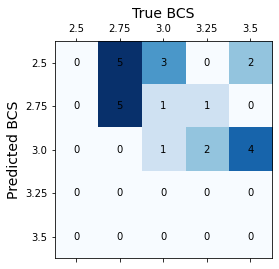

In [94]:
test_acc = confusion_matrix_display(labels, predictions_test)